<a href="https://colab.research.google.com/github/eddes/buildingphysics/blob/feature%2Fpipenv_and_notebooks/notebooks/chapter_1/Euler_and_CN_schemes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stability for Euler’s explicit and  Crank-Nicolson’ schemes**
## Building Physics - Applications in python - Chapter 1

The notebook illustrates an example of numerical integration of partial differential equation. The objective here is to integrate the equation 
$ \frac{\partial T}{\partial t}
   = \alpha \frac{\partial^2 T}{\partial x^2} $ in the case of a homogeneous media and test the conditions ensuring its stability.




In [0]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import  interact_manual
import ipywidgets as widgets
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

### Euler explicit scheme - vector
**Book reference page 11** 

We define `n` as the amount of cells we split the media into, `T` an array of size `n`, representing the temperature for each cell at time `t`, `T_plus` an array of size `n`, representing the temperature for each cell at time `t + dt`.

`L` is the length of the media (supposed of dimension 1 here). `dt` is the elementary time step of the simulation (s), for a total simulation time of `sim_time` (s)

We introduce Fourier’s non-dimensional number Fo = $ \alpha \frac{ \Delta T}{\Delta x^2} $
 the ratio of conduction heat transfer to thermal storage in the material slice.

By default in this example, the media starts with a homogenous temperature of 0 degC. At the start of the simulation, the left border of the media is set to 10 degC as a boundary condition.


In [0]:

n=100
T_plus=np.zeros(n)
T=np.zeros(n)

t=0
sim_time=600
dt=1

L=0.1 # m
alpha=1e-7 #m2/s
dx=L/n # 


Let's run the simulation a first time. In this case, `Fo = 0.1`, respecting the empirical stability criteria of Fo < 0.5.



Fo = 0.1


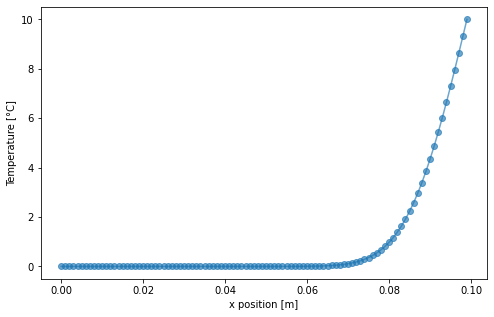

In [32]:

Fo=alpha*dt/dx**2
print("Fo = {}".format(Fo))
if Fo>0.5:
	print("stability issue")
# time 
while t < sim_time:
	# boundary conditions
	T[0]=0
	T[n-1]=10
	# inside the domain 
	for i in range(1,n-1):
		T_plus[i]=T[i]*(1-2*Fo)+Fo*(T[i+1]+T[i-1])
	T=T_plus # replace 
	t+=dt
	
x_pos=np.arange(0,L,dx)
plt.xlabel("x position [m]")
plt.ylabel("Temperature [°C]")
plt.plot(x_pos, T_plus, 'o-', alpha=0.65)


Let's now plot the same simulation with a different value of Fo. The interactive plot allows you to pick a value then run the simulation.

In [33]:
# Defining the simulation as a method with Fo as an argument.

def plot_temperature_evolution(Fo):
  n=100
  T_plus=np.zeros(n)
  T=np.zeros(n)
  t=0
  sim_time=600
  dt=1
  while t < sim_time:
    T[0]=0
    T[n-1]=10
    for i in range(1,n-1):
      T_plus[i]=T[i]*(1-2*Fo)+Fo*(T[i+1]+T[i-1])
    T=T_plus 
    t+=dt
	
  x_pos=np.arange(0,L,dx)
  plt.xlabel("x position [m]")
  plt.ylabel("Temperature [°C]")
  plt.plot(x_pos, T_plus, 'o-', alpha=0.65)

# Creating an interactive graph based on IPython Widgets
interact_manual(plot_temperature_evolution, Fo = widgets.FloatSlider(value=0.2,    min=0,
                                               max=1,
                                               step=0.1))

interactive(children=(FloatSlider(value=0.2, description='Fo', max=1.0), Button(description='Run Interact', st…

<function __main__.plot_temperature_evolution>

### Euler explicit scheme - matrix
**Book reference page 12** 

Same exemple, yet described with a matrix implementation. The instability can be clearly seen for `Fo > 0.5`.

In [49]:
# Defining the simulation as a method with Fo as an argument.

def plot_temperature_evolution_matrix(Fo):
  n=50+2 # number of nodes
  K=np.eye(n,n,k=-1)*1 + np.eye(n,n)*-2 + np.eye(n,n,k=1)*1

  K[0,0]=0
  K[0,1]=0
  K[-1,-1]=0
  K[-1,-2]=0
  T_plus=np.zeros(n)
  T=np.zeros(n)

  plt.plot()
  
  t=0
  sim_time=600
  dt=1

  L=0.1 # m
  dx = L/n
  T[0]=0
  T[n-1]=10
 
  # time 
  while t < sim_time:
    # matrix multiplicatio K*T
    T_plus=Fo*np.dot(K,T) +T
    T=T_plus # replace 
    t+=dt


  x_pos=np.arange(0,L,dx)
  plt.xlabel("x position [m]")
  plt.ylabel("Temperature [°C]")
  plt.plot(x_pos, T_plus, 'o-', alpha=0.65)


# Creating an interactive graph based on IPython Widgets
interact_manual(plot_temperature_evolution_matrix, Fo = widgets.FloatSlider(value=0.2,    min=0,
                                                max=1,
                                                step=0.1))

interactive(children=(FloatSlider(value=0.2, description='Fo', max=1.0), Button(description='Run Interact', st…

<function __main__.plot_temperature_evolution_matrix>

### Crank-Nicolson scheme 
**Book reference page 16** 

Euler’s explicit scheme has the advantage of simplicity and straightforward implementation, however its stability conditions are often detrimental to execution time. A means of increasing stability is to change the explicit numerical scheme for an implicit scheme.